In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [95]:
df = pd.read_csv("car_data[1].csv")

In [97]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [99]:
len(df['Car_Name'].unique())

98

In [101]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [103]:
df.shape

(301, 9)

### The dataset contains 301 samples and 9 columns.

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### From above we can confirm that there is no NA values

In [109]:
df.describe(include='object')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


### Form above table we got the information about the object type data

Since Car_Name contains 98 unique categories, and this number of categories is very high compared to the number of dataset samples, it is better to drop it

In [113]:
df.drop('Car_Name', axis = 1, inplace = True)

In [115]:
df.head(2)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [117]:
df['Year'].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

### "Year" shows the car model year. We can replace this column with the cars age attribute.To calculate the age, we consider the origin time to be 1 year older than the maximum model year:

In [120]:
df.insert(0, "Age", df["Year"].max()+1-df["Year"] )
df.drop('Year', axis = 1, inplace = True)
df.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Now we will confirm that is there any Duplicate value or not

In [123]:
df[df.duplicated()]

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,3,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,4,23.00,30.61,40000,Diesel,Dealer,Automatic,0


### Here we found 2 Duplicate rows but we keep them instead of droping them 

### now we are going to store Categorical data into a new variable

In [127]:
CatCol = ['Fuel_Type', 'Seller_Type', 'Transmission']

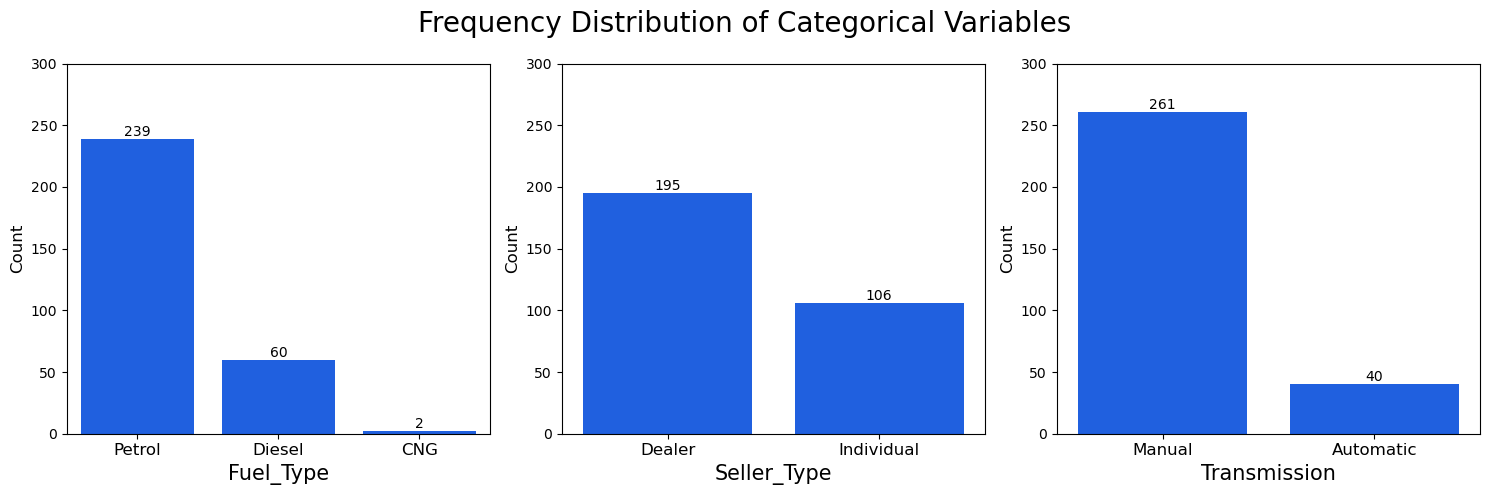

In [129]:
fig, ax = plt.subplots(nrows=1, ncols=len(CatCol), figsize=(15, 5), dpi=100)

# Custom colors for the plots
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

# Loop through categorical columns to create countplots
for i in range(len(CatCol)):
    graph = sns.countplot(x=CatCol[i], data=df, ax=ax[i])  # Use df instead of df1
    ax[i].set_xlabel(CatCol[i], fontsize=15)
    ax[i].set_ylabel('Count', fontsize=12)
    ax[i].set_ylim([0, 300])
    
    # Set the tick positions explicitly before modifying the tick labels
    ax[i].set_xticks(range(len(ax[i].get_xticklabels())))
    ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=12)

    # Add labels to bars
    for cont in graph.containers:
        graph.bar_label(cont)

# Set the title and layout
plt.suptitle('Frequency Distribution of Categorical Variables', fontsize=20)
plt.tight_layout()
plt.show()


conclusion

### There are 3 Fuel_Type categories. Petrol has the highest frequency and CNG has the least frequency.
### There are 2 Seller_Type categories. Dealer has the highest frequency and Individual has the least frequency.
### There are 2 Transmission categories. Manual has the highest frequency and Automatic has the least frequency.

now we are going to convert the categorical data into numeric data

In [134]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
df.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,0,0,0,0
1,6,4.75,9.54,43000,1,0,0,0
2,2,7.25,9.85,6900,0,0,0,0
3,8,2.85,4.15,5200,0,0,0,0
4,5,4.60,6.87,42450,1,0,0,0


### Fuel_Type == Petrol = 0, Diesel = 1, CNG = 2
### Seller_Type == Dealer = 0, Individual = 1
### Transmission == Manual = 0, Automatic = 1

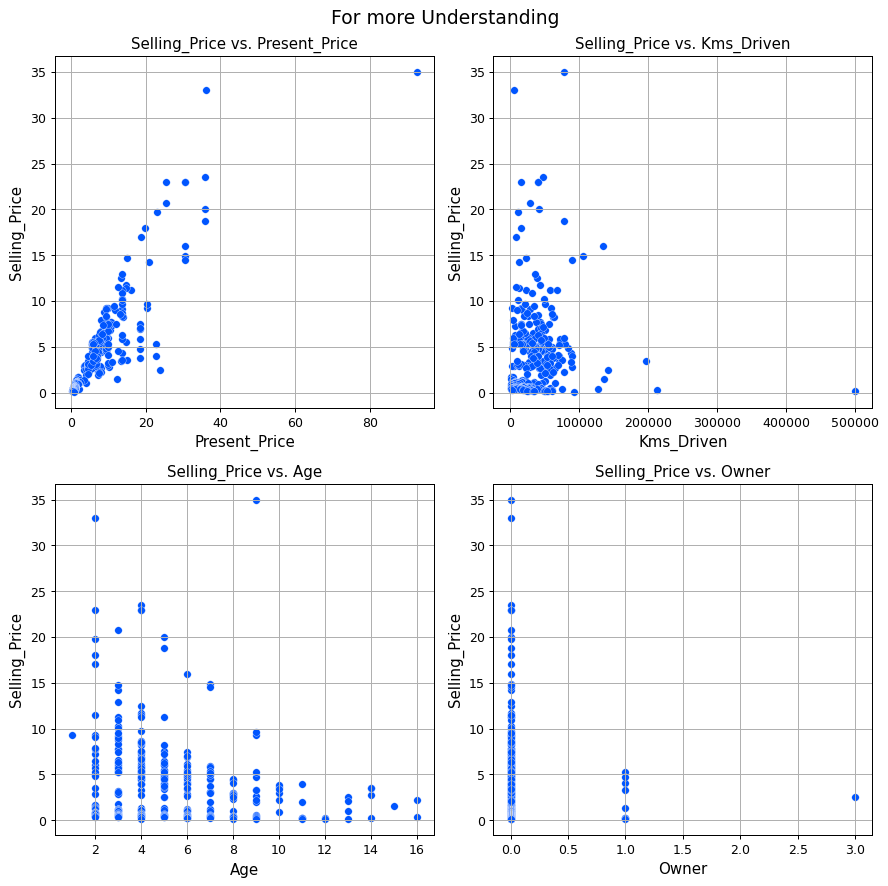

In [137]:
# Define numeric features and target variable
num_features = ['Present_Price', 'Kms_Driven', 'Age', 'Owner']
target = 'Selling_Price'
c = '#0055ff'

# Create 2x2 subplot layout
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), dpi=90)

# Loop through each numeric feature and plot against Selling_Price
for i in range(len(num_features)):
    row = i // 2  # Determine row index (0 or 1)
    col = i % 2   # Determine column index (0 or 1)
    
    ax[row, col].scatter(df[num_features[i]], df[target], color=c, edgecolors='w', linewidths=0.25)
    ax[row, col].set_title(f'{target} vs. {num_features[i]}', size=12)
    ax[row, col].set_xlabel(num_features[i], size=12)
    ax[row, col].set_ylabel(target, size=12)
    ax[row, col].grid()

# Set a global title for all subplots
plt.suptitle('For more Understanding', size=15)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### Conclusion:
Diesel Cars > CNG Cars > Petrol Cars in terms of Selling_Price.

The Selling_Price of cars sold by individuals is lower than the price of cars sold by dealers.

Automatic cars are more expensive than manual cars.

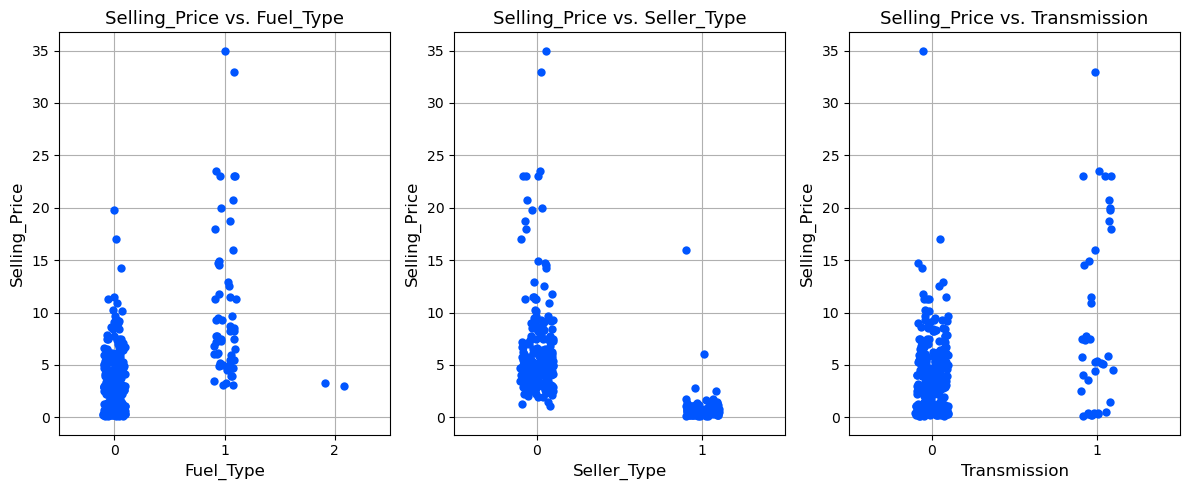

In [140]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5), dpi=100)
cat_features = ['Fuel_Type', 'Seller_Type', 'Transmission']
target = 'Selling_Price'
c = '#0055ff'

for i in range(len(cat_features)):
    sns.stripplot(ax=axes[i], x=cat_features[i], y=target, data=df, size=6, color=c)
    axes[i].set_title('{} vs. {}'.format(target, cat_features[i]), size=13)
    axes[i].set_xlabel(cat_features[i], size=12)
    axes[i].set_ylabel(target, size=12)
    axes[i].grid()


plt.tight_layout()
plt.show()


### Conclusion:
Diesel Cars > CNG Cars > Petrol Cars in terms of Selling_Price.

The Selling_Price of cars sold by individuals is lower than the price of cars sold by dealers.

Automatic cars are more expensive than manual cars.

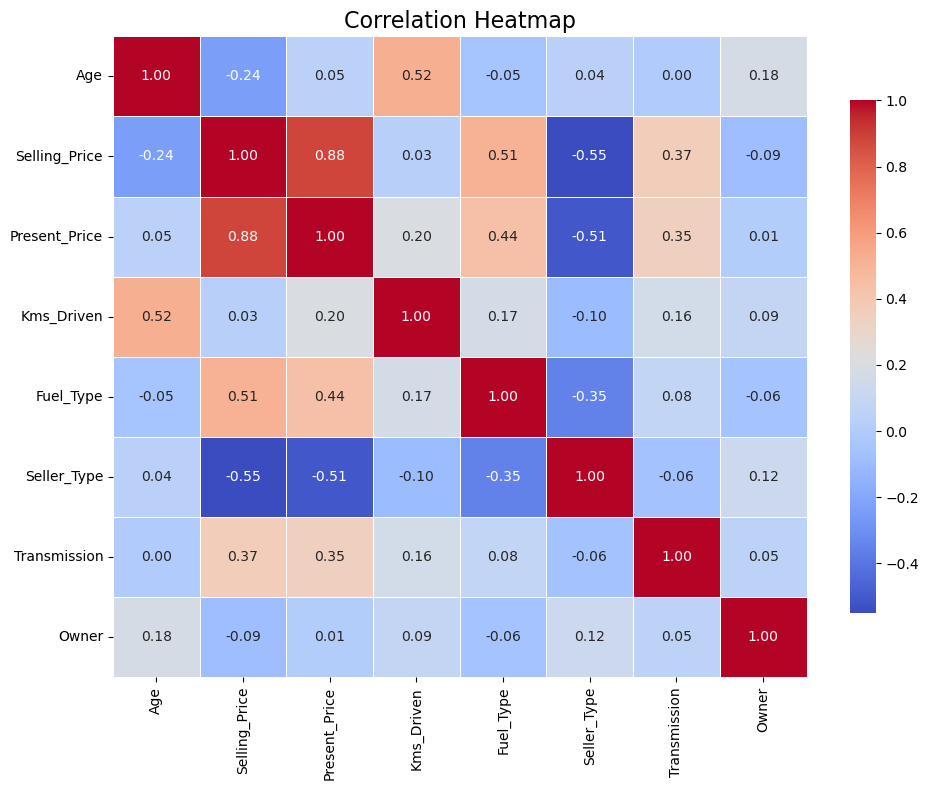

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})

# Set title and labels
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()


### Conclusion:
The target variable "Selling Price" is highly correlated with Present_Price & Fuel_Type.

Some independent variables like Fuel_Type_Petrol and Fuel_Type_Disel are highly correlated, which is called Multicollinearity

### Now Splitting the data and Target

In [147]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

### Split Dataset to Training & Test Sets

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [152]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (210, 7)
X_test shape:  (91, 7)
y_train shape:  (210,)
y_test shape:  (91,)


### Here we use Random Forest

Random Forest Model Evaluation:
MAE: 0.7659945054945057
MSE: 2.5965304001098892
RMSE: 1.6113753132370774
R2-Score: 0.9131771057130285


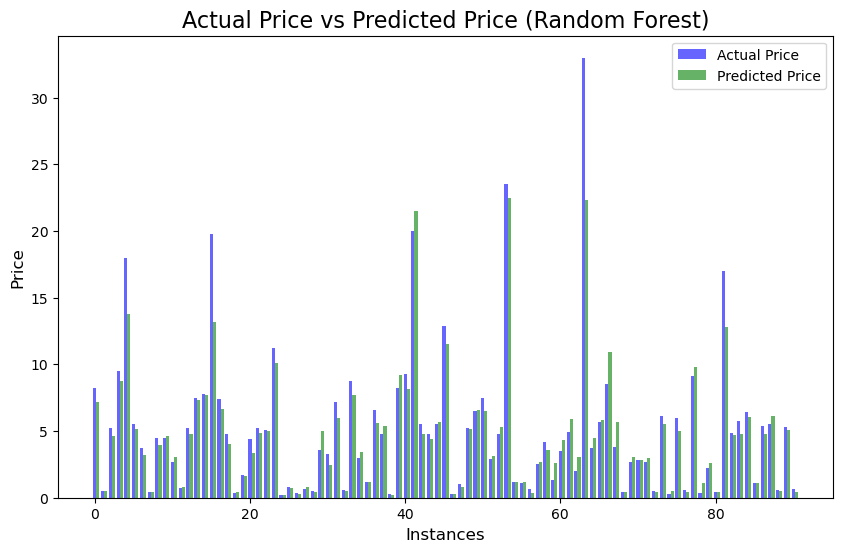

In [155]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
# Step 1: Train the Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=0)
random_forest_model.fit(X_train, y_train)

# Step 2: Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Step 3: Evaluate the model performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Step 4: Display the evaluation metrics
print('Random Forest Model Evaluation:')
print(f'MAE: {mae_rf}')
print(f'MSE: {mse_rf}')
print(f'RMSE: {rmse_rf}')
print(f'R2-Score: {r2_rf}')

# Step 5: Optional - Visualize Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
index = range(len(y_test))  # Generate index for bar plot
bar_width = 0.4  # Width of the bars
plt.bar(index, y_test, bar_width, label='Actual Price', color='blue', alpha=0.6)
plt.bar([i + bar_width for i in index], y_pred_rf, bar_width, label='Predicted Price', color='green', alpha=0.6)

# Adding labels and title
plt.xlabel('Instances', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Actual Price vs Predicted Price (Random Forest)', fontsize=16)
plt.legend()
plt.show()


In [157]:
version = 1

In [159]:
import pickle
pickle.dump(random_forest_model, open(f'car_price_{version}.pkl','wb'))

In [161]:
model = pickle.load(open('car_price.pkl','rb'))

In [163]:
print(model.predict([[6,9.54,43000,1,0,0,0]]))

[5.0815]
